# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# Setting Up URLs and units preference
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'


# Create empty lists to place information from API

lng = []
lat = []
city_name = []
temp_high = []
temp_low = []
humidity = []
cloudiness = []
wind_spd = []
country = []
date = []

# Set up counter
record = 1 

# Formatting 
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:
   
    try:
        #Setting up URLs
        query_url = f'{url}appid={weather_api_key}&q={city}&units={units}'
        response = requests.get(query_url)
        response_json = response.json()
    
        # Pulling data from API and sorting them to the correct lists
        lng.append(response_json['coord']['lon'])
        lat.append(response_json['coord']['lat'])
        city_name.append(response_json['name'])
        date.append(response_json['dt'])
        country.append(response_json['sys']['country'])
        temp_high.append(response_json['main']['temp_max'])
        temp_low.append(response_json['main']['temp_min'])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind_spd.append(response_json['wind']['speed'])
    
        # Formatting variables for response
        city_response = response_json['name']
        print(f'Processing Record {record} | {city_response}')
    
        # Adding to the count
        record = record + 1
    
    except:
        # If there's an error, print this statement
        print(f'City not found. Skipping...')

    continue
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Busselton
Processing Record 2 | Mandlā
City not found. Skipping...
Processing Record 3 | Upernavik
Processing Record 4 | Kapaa
Processing Record 5 | Olafsvik
City not found. Skipping...
Processing Record 6 | Hermanus
Processing Record 7 | Atuona
Processing Record 8 | Barrow
Processing Record 9 | Tiksi
Processing Record 10 | Butaritari
Processing Record 11 | Slavonski Brod
Processing Record 12 | Lorengau
Processing Record 13 | Hatton
Processing Record 14 | Touros
Processing Record 15 | Lavrentiya
Processing Record 16 | Vaini
Processing Record 17 | Haysville
Processing Record 18 | Tanout
Processing Record 19 | Boa Vista
Processing Record 20 | Pevek
City not found. Skipping...
Processing Record 21 | Ushuaia
Processing Record 22 | Sivaki
Processing Record 23 | Puerto Ayora
City not found. Skipping...
Processing Record 24 | Kushima
Processing Record 25 | Bredasdorp
Processing Record 26 | Tilichiki
Processing Reco

Processing Record 225 | Baykit
City not found. Skipping...
Processing Record 226 | Nuuk
Processing Record 227 | Itoman
Processing Record 228 | Faanui
Processing Record 229 | Chicama
Processing Record 230 | New Norfolk
Processing Record 231 | Arraial do Cabo
Processing Record 232 | Nassau
Processing Record 233 | Ponta do Sol
Processing Record 234 | Thompson
Processing Record 235 | Verkhnyaya Sysert’
Processing Record 236 | Praia da Vitória
Processing Record 237 | Bariloche
Processing Record 238 | Pecos
Processing Record 239 | Murbād
Processing Record 240 | Otavi
Processing Record 241 | Marck
Processing Record 242 | Kaniama
Processing Record 243 | Vanimo
Processing Record 244 | Fort-Shevchenko
Processing Record 245 | Sur
City not found. Skipping...
Processing Record 246 | Havre-St-Pierre
Processing Record 247 | La Romana
Processing Record 248 | La Rioja
Processing Record 249 | Arak
City not found. Skipping...
Processing Record 250 | Esmeraldas
Processing Record 251 | Isla Mujeres
Process

Processing Record 456 | Ancud
Processing Record 457 | Fes
Processing Record 458 | Yangi Marg`ilon
Processing Record 459 | Ponta Delgada
Processing Record 460 | Tōbetsu
Processing Record 461 | Nārsingi
Processing Record 462 | Sept-Îles
Processing Record 463 | Chiredzi
Processing Record 464 | San Isidro
Processing Record 465 | Ayan
Processing Record 466 | Teeli
Processing Record 467 | Sibolga
City not found. Skipping...
Processing Record 468 | Magalia
Processing Record 469 | Anastácio
Processing Record 470 | Władysławowo
City not found. Skipping...
Processing Record 471 | Dorokhovo
Processing Record 472 | General Roca
Processing Record 473 | Bilma
Processing Record 474 | Fort Nelson
Processing Record 475 | Okha
Processing Record 476 | Bay Roberts
City not found. Skipping...
Processing Record 477 | Nikel
Processing Record 478 | Troutdale
Processing Record 479 | Tabou
Processing Record 480 | San Cristobal
Processing Record 481 | Scarborough
Processing Record 482 | Kattivākkam
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
# Creating a dictionary to store data
weather_dict = {
    "City": city_name,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp": temp_high,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_spd,
    "Country": country,
    "Date": date}

In [26]:
# Converting data to a data frame
weather_data = pd.DataFrame(weather_dict)

# Previewing the count on the cities
weather_data.count()

City          563
Latitude      563
Longitude     563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [28]:
# Previewing the data frame
weather_data.head(5)

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,46.99,89,74,4.85,AU,1596057156
1,Mandlā,22.60,80.38,76.35,88,100,2.55,IN,1596057415
2,Upernavik,72.79,-56.15,43.18,88,59,4.68,GL,1596057342
3,Kapaa,22.08,-159.32,79.00,78,90,16.11,US,1596057415
4,Olafsvik,64.89,-23.71,51.84,79,79,2.91,IS,1596057568


In [31]:
# Exporting data to csv

weather_data.to_csv (f'weather_data.csv', index = False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [30]:
# Sorting the Humidity column to find if any are > 100% humidity--there are none. 
# * Never going to Honiara *

weather_data.sort_values(by='Humidity', ascending=False)

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
369,Honiara,-9.43,159.95,75.20,100,75,4.70,SB,1596057516
355,Dneprovskaya,45.62,38.81,70.00,100,0,3.15,RU,1596057512
234,Verkhnyaya Sysert’,56.44,60.75,57.20,100,98,6.71,RU,1596057481
253,Moree,-29.47,149.85,39.20,100,75,4.70,AU,1596057433
410,Kathu,7.92,98.33,82.99,100,75,2.24,TH,1596057527
...,...,...,...,...,...,...,...,...,...
472,Bilma,18.69,12.92,95.90,15,82,1.03,NE,1596057543
522,Cheney,47.49,-117.58,96.01,14,1,10.29,US,1596057440
475,Bay Roberts,47.60,-53.26,59.00,13,71,6.13,CA,1596057410
269,Saint George,37.10,-113.58,105.01,7,1,9.17,US,1596057341


In [7]:
#  Get the indices of cities that have humidity over 100%.

# No cities have a humidity over 100%

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# N/A

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

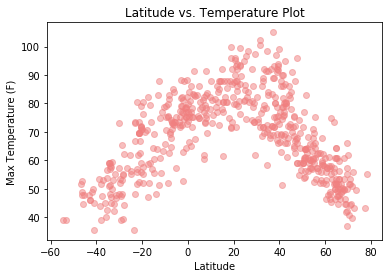

<Figure size 432x288 with 0 Axes>

In [71]:
x_values = weather_data['Latitude']
y_values = weather_data['Max Temp']
plt.scatter(x_values,y_values, color="lightcoral", alpha=0.5)
plt.title('Latitude vs. Temperature Plot')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

# Save a copy of the plot
plt.savefig("lat_vs_temp_plot.png")

## Latitude vs. Humidity Plot

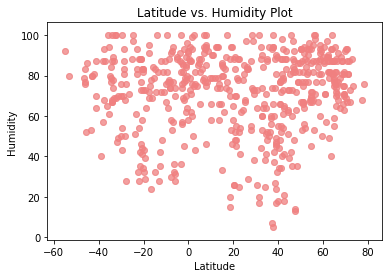

<Figure size 432x288 with 0 Axes>

In [72]:
x_values = weather_data['Latitude']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values, color="lightcoral", alpha=0.5)
plt.scatter(x_values,y_values, color="lightcoral", alpha=0.5)
plt.title('Latitude vs. Humidity Plot')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

# Save a copy of the plot
plt.savefig("lat_vs_hum_plot.png")

## Latitude vs. Cloudiness Plot

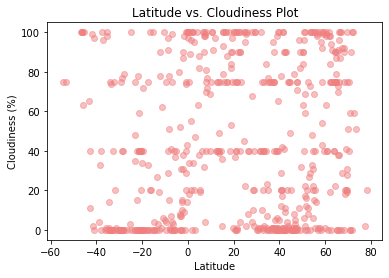

<Figure size 432x288 with 0 Axes>

In [73]:
x_values = weather_data['Latitude']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values, color="lightcoral", alpha=0.5)
plt.title('Latitude vs. Cloudiness Plot')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

# Save a copy of the plot
plt.savefig("lat_vs_cloud_plot.png")

## Latitude vs. Wind Speed Plot

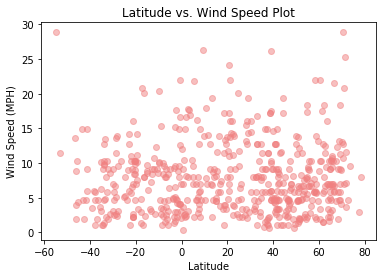

<Figure size 432x288 with 0 Axes>

In [74]:
x_values = weather_data['Latitude']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values, color="lightcoral", alpha=0.5)
plt.title('Latitude vs. Wind Speed Plot')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.show()

# Save a copy of the plot
plt.savefig("lat_vs_wind_plot.png")

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [49]:
# Create Northern and Southern Hemisphere DataFrames based on their latitude

north_hem_df = weather_data[weather_data['Latitude'] > 0]

south_hem_df = weather_data[weather_data['Latitude'] < 0]

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,46.99,89,74,4.85,AU,1596057156
5,Hermanus,-34.42,19.23,59.00,79,14,1.01,ZA,1596057547
6,Atuona,-9.80,-139.03,79.00,76,4,20.47,PF,1596057541
11,Lorengau,-2.02,147.27,81.19,68,31,4.70,PG,1596057569
13,Touros,-5.20,-35.46,75.20,88,40,9.17,BR,1596057418
15,Vaini,-21.20,-175.20,69.80,77,40,16.11,TO,1596057327
20,Ushuaia,-54.80,-68.30,39.20,92,75,28.86,AR,1596057251
22,Puerto Ayora,-0.74,-90.35,75.20,64,20,21.92,EC,1596057420
24,Bredasdorp,-34.53,20.04,59.00,77,1,9.17,ZA,1596057421
30,Bluff,-46.60,168.33,51.71,79,100,13.67,NZ,1596057422


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.49999746529061645


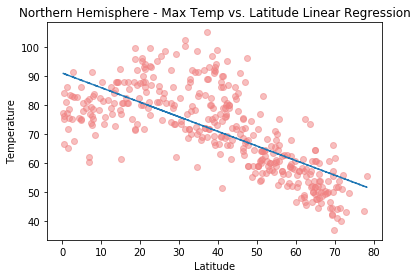

<Figure size 432x288 with 0 Axes>

In [75]:
# Define the x and y values in the northern hemisphere
x_values = north_hem_df['Latitude']
y_values = north_hem_df['Max Temp']

# Calculating the pivitol stats
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
fit = slope * x_values + intercept

# Build the plot
plt.scatter(x_values, y_values, color="lightcoral", alpha=0.5)
plt.plot(x_values,fit,"--")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
# Show plot
plt.show()

# Save a copy of the plot
plt.savefig("nhem_lat_vs_temp_plot.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5892269315348965


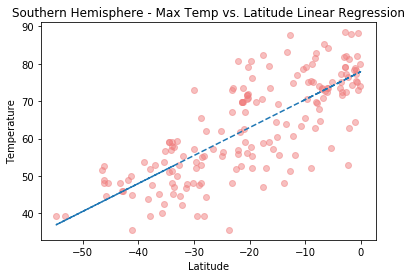

<Figure size 432x288 with 0 Axes>

In [76]:
# Define the x and y values in the southern hemisphere
x_values = south_hem_df['Latitude']
y_values = south_hem_df['Max Temp']

# Calculating the pivitol stats
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
fit = slope * x_values + intercept

# Build the plot
plt.scatter(x_values, y_values, color="lightcoral", alpha=0.5)
plt.plot(x_values,fit,"--")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

# Save a copy of the plot
plt.savefig("shem_lat_vs_temp_plot.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0056081504757590035


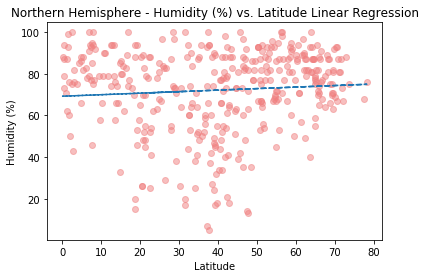

<Figure size 432x288 with 0 Axes>

In [77]:
# Define the x and y values in the northern hemisphere
x_values = north_hem_df['Latitude']
y_values = north_hem_df['Humidity']

# Calculating the pivitol stats
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
fit = slope * x_values + intercept

# Build the plot
plt.scatter(x_values, y_values, color="lightcoral", alpha=0.5)
plt.plot(x_values,fit,"--")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

# Save a copy of the plot
plt.savefig("nhem_lat_vs_hum_plot.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.003233719802699877


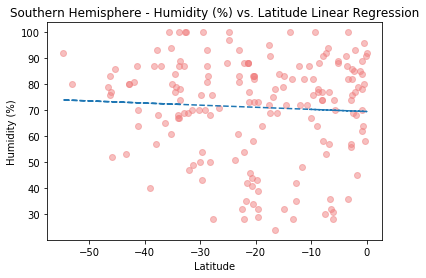

<Figure size 432x288 with 0 Axes>

In [78]:
# Define the x and y values in the southern hemisphere
x_values = south_hem_df['Latitude']
y_values = south_hem_df['Humidity']

# Calculating the pivitol stats
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
fit = slope * x_values + intercept

# Build the plot
plt.scatter(x_values, y_values, color="lightcoral", alpha=0.5)
plt.plot(x_values,fit,"--")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

# Save a copy of the plot
plt.savefig("shem_lat_vs_hum_plot.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.010743770503617222


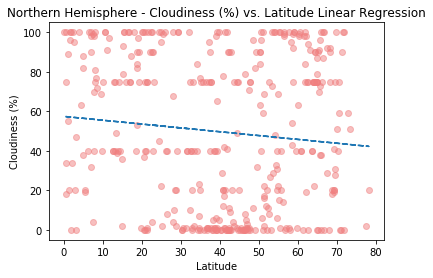

<Figure size 432x288 with 0 Axes>

In [79]:
# Define the x and y values in the northern hemisphere
x_values = north_hem_df['Latitude']
y_values = north_hem_df['Cloudiness']

# Calculating the pivitol stats
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
fit = slope * x_values + intercept

# Build the plot
plt.scatter(x_values, y_values, color="lightcoral", alpha=0.5)
plt.plot(x_values,fit,"--")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

# Save a copy of the plot
plt.savefig("nhem_lat_vs_cloud_plot.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00277320606115922


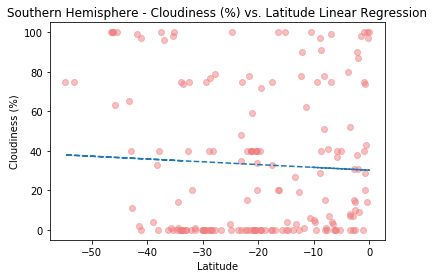

<Figure size 432x288 with 0 Axes>

In [80]:
# Define the x and y values in the southern hemisphere
x_values = south_hem_df['Latitude']
y_values = south_hem_df['Cloudiness']

# Calculating the pivitol stats
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
fit = slope * x_values + intercept

# Build the plot
plt.scatter(x_values, y_values, color="lightcoral", alpha=0.5)
plt.plot(x_values,fit,"--")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

# Save a copy of the plot
plt.savefig("shem_lat_vs_cloud_plot.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.002716411633372958


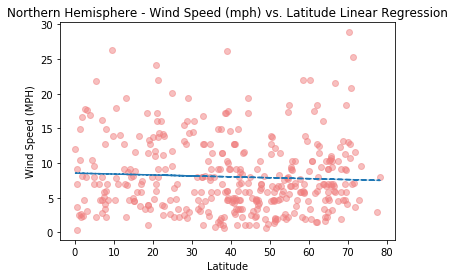

<Figure size 432x288 with 0 Axes>

In [81]:
# Define the x and y values in the northern hemisphere
x_values = north_hem_df['Latitude']
y_values = north_hem_df['Wind Speed']

# Calculating the pivitol stats
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
fit = slope * x_values + intercept

# Build the plot
plt.scatter(x_values, y_values, color="lightcoral", alpha=0.5)
plt.plot(x_values,fit,"--")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

# Save a copy of the plot
plt.savefig("nhem_lat_vs_wind_plot.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.002024585579135627


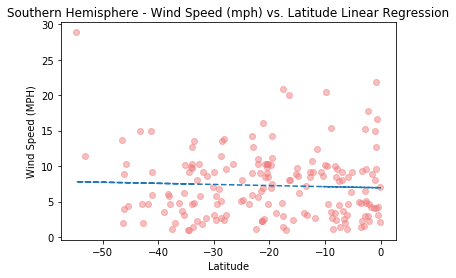

<Figure size 432x288 with 0 Axes>

In [82]:
# Define the x and y values in the southern hemisphere
x_values = south_hem_df['Latitude']
y_values = south_hem_df['Wind Speed']

# Calculating the pivitol stats
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
fit = slope * x_values + intercept

# Build the plot
plt.scatter(x_values, y_values, color="lightcoral", alpha=0.5)
plt.plot(x_values,fit,"--")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

# Save a copy of the plot
plt.savefig("shem_lat_vs_wind_plot.png")